## Assignment 5 (10 Points): Pipes, Functions, Vectors, and Iterations

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Q1 (3 points): Write a function (named ```plot_cat```) to automatically detect and plot the distributions of all categorical variables in a given dataset. Hint: Use the following keywords:
```
function, for, seq_along, names, if, is.factor, ggplot, geom_bar, labs, theme, print
```

In [14]:
plot_cat <- function(df)
{
    nms <- names(df)
    nms.factor <- c()
    for(i in seq_along(nms))
    {
        if(is.factor(df[[nms[i]]]))
        {
            nms.factor <- c(nms.factor, nms[i]) 
        }
    }
    for(i in seq_along(nms.factor))
    {
        print(df %>% ggplot() + geom_bar(aes_string(nms.factor[i])) + theme_bw() + 
              theme(axis.text.x.bottom = element_text(angle = 45, hjust = 1)))
    } 
}

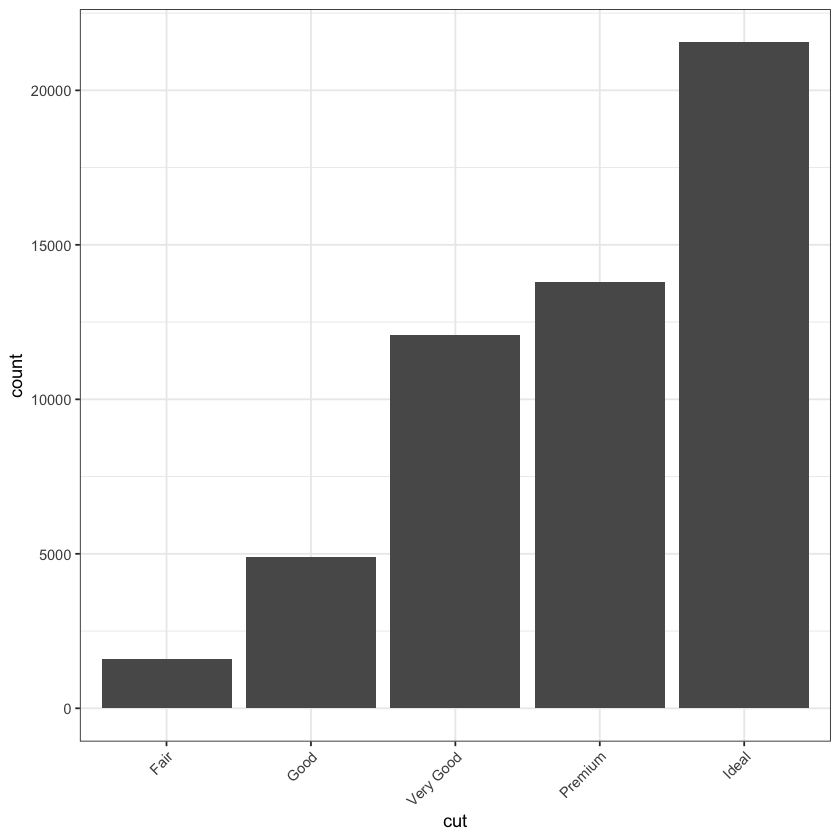

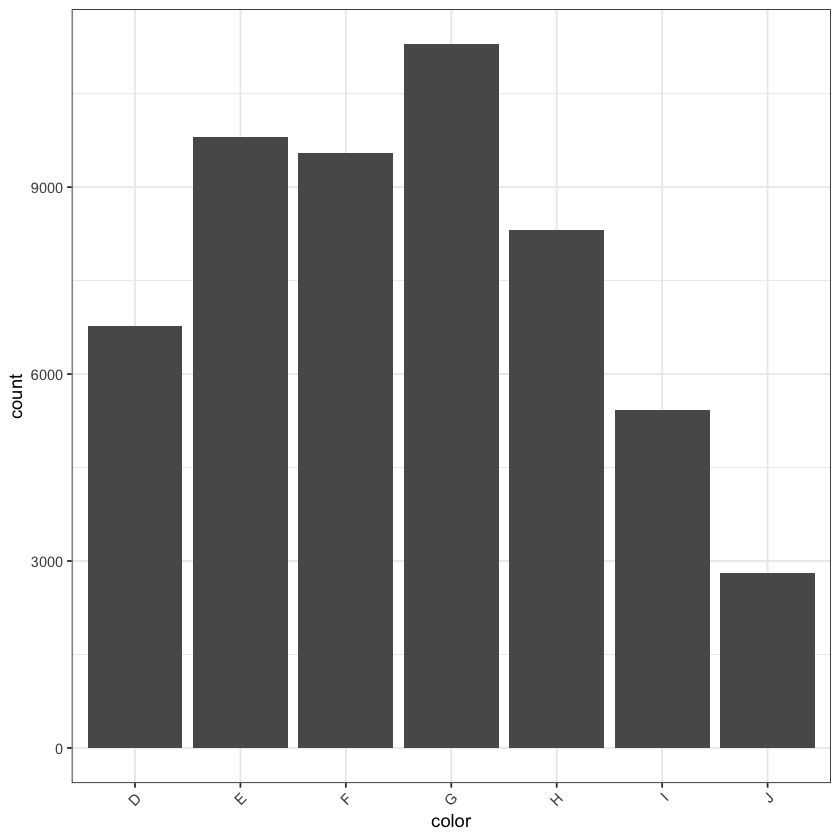

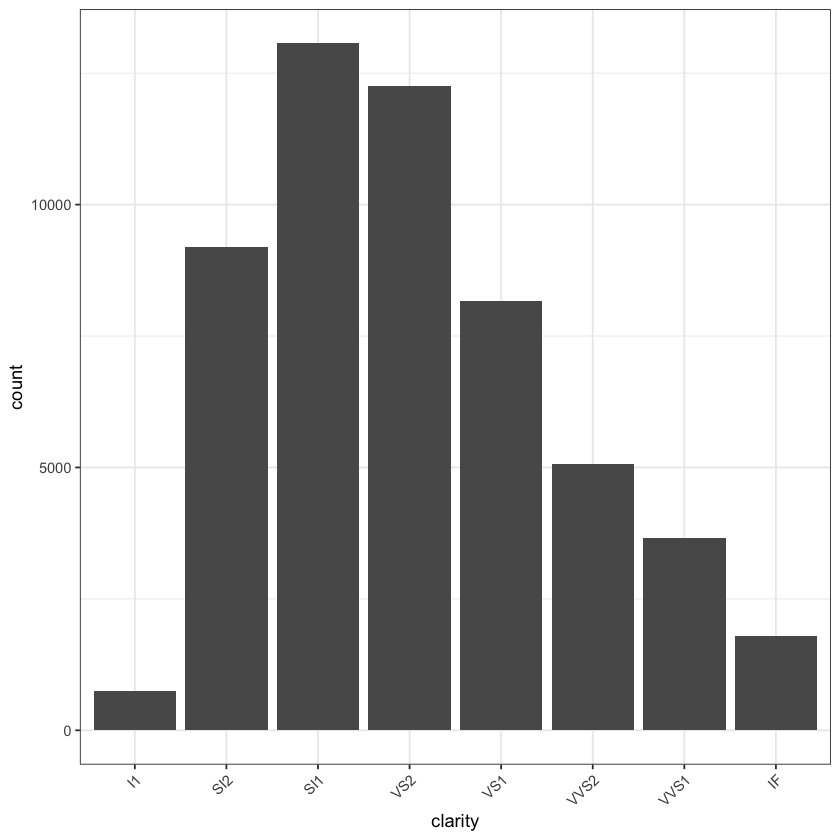

In [15]:
diamonds %>% plot_cat()

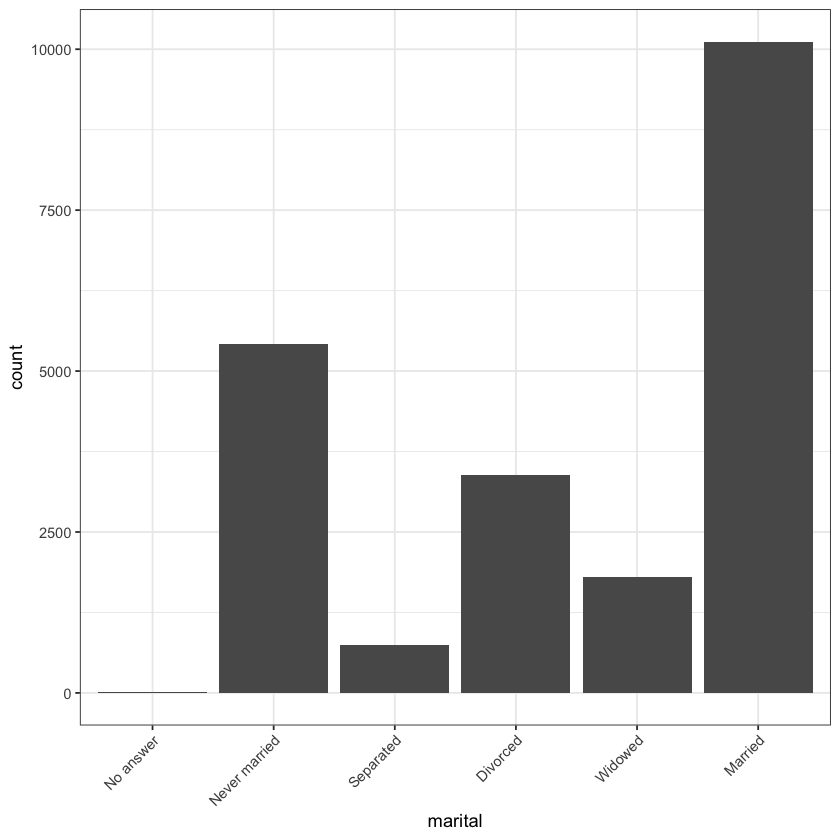

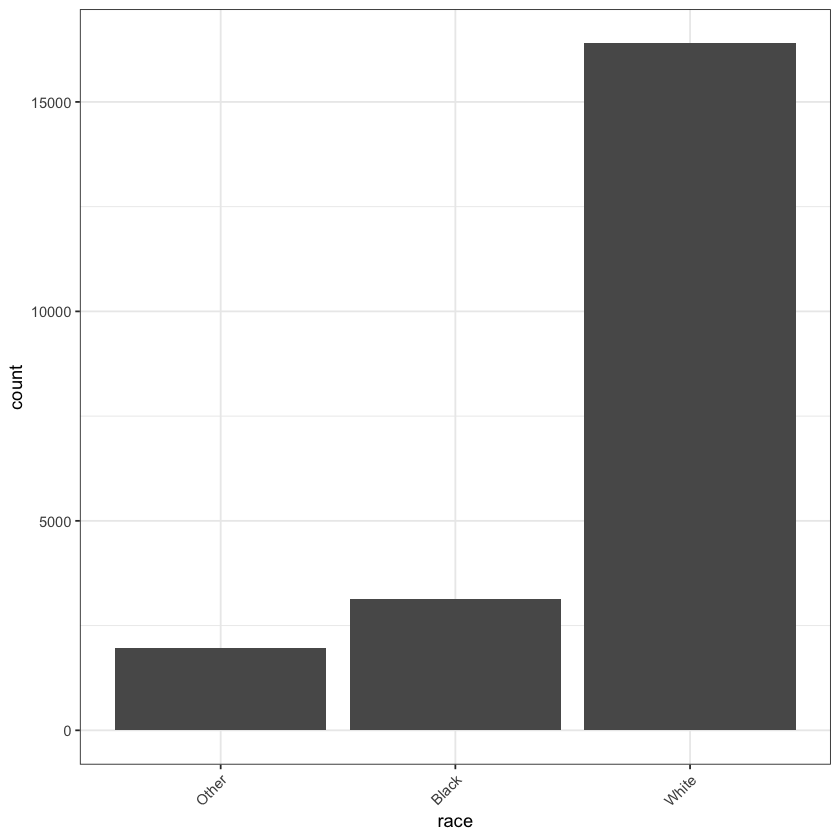

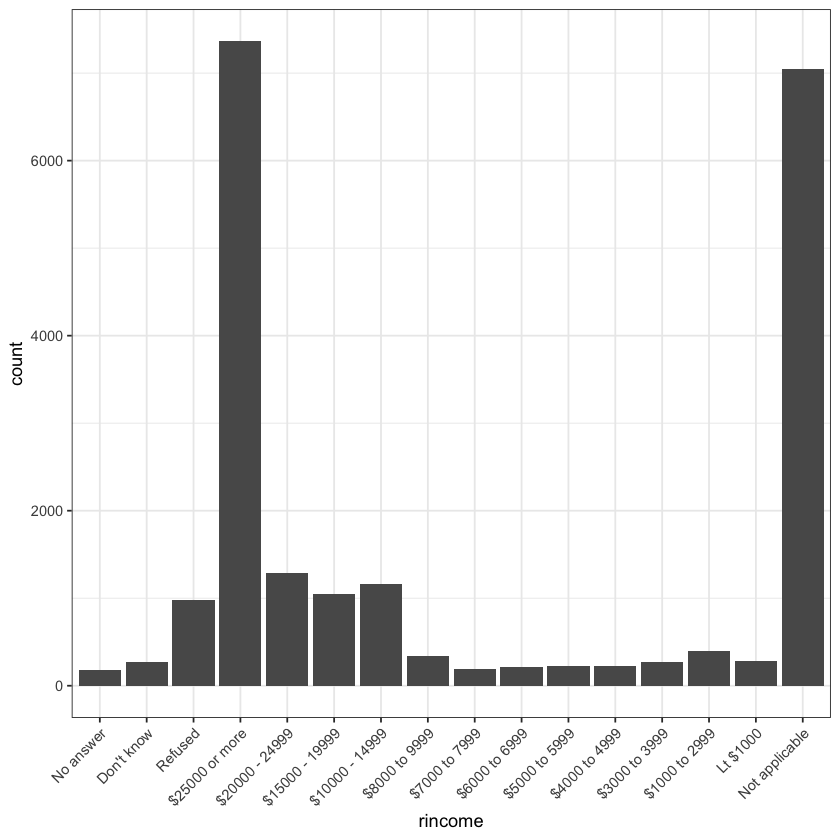

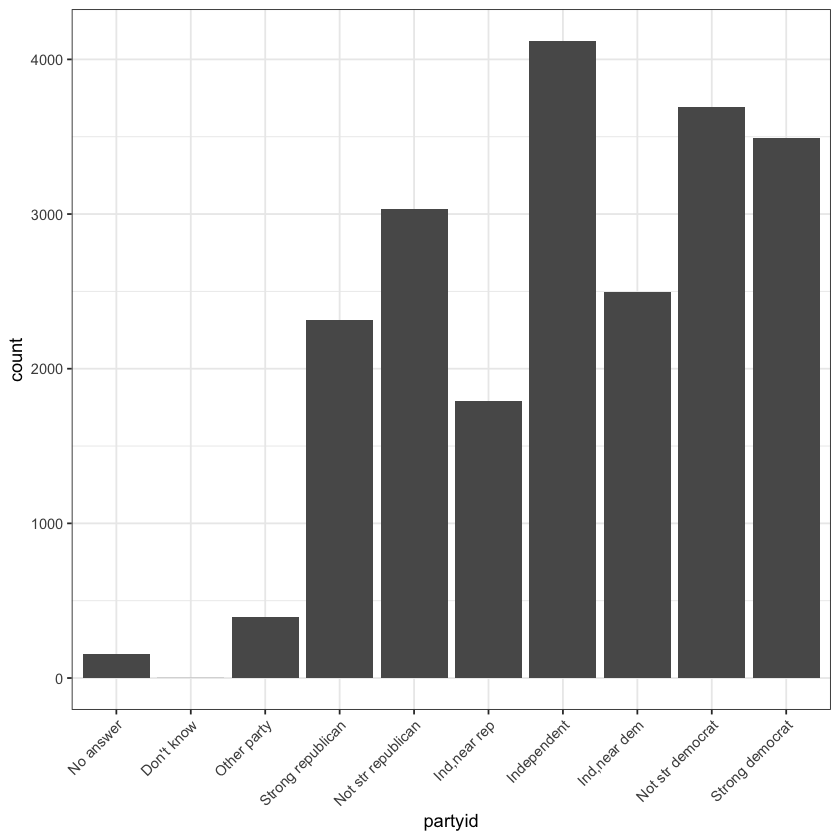

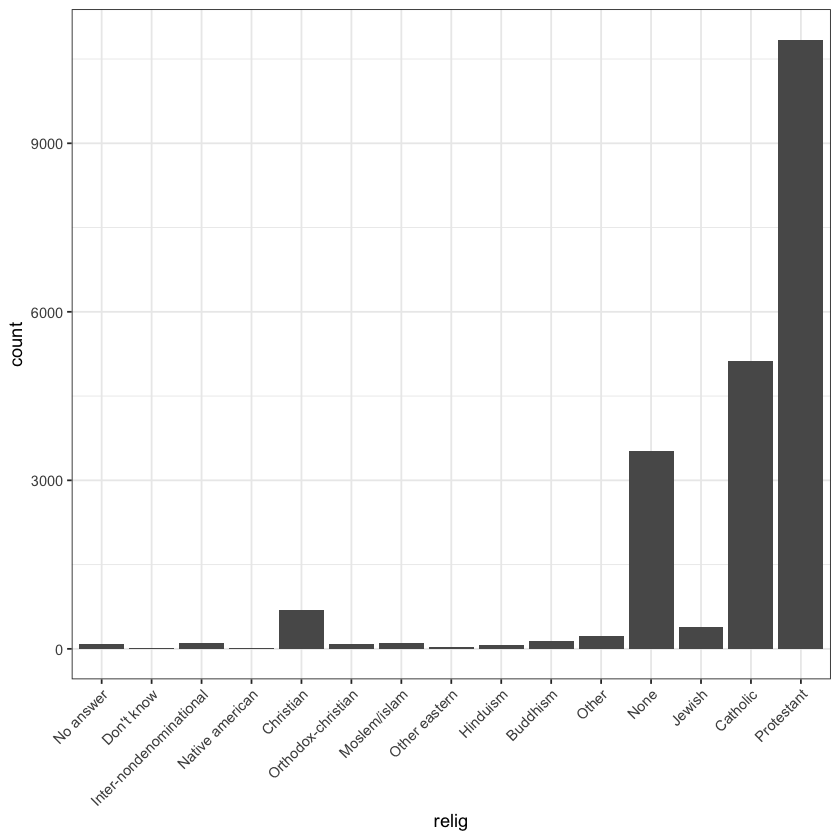

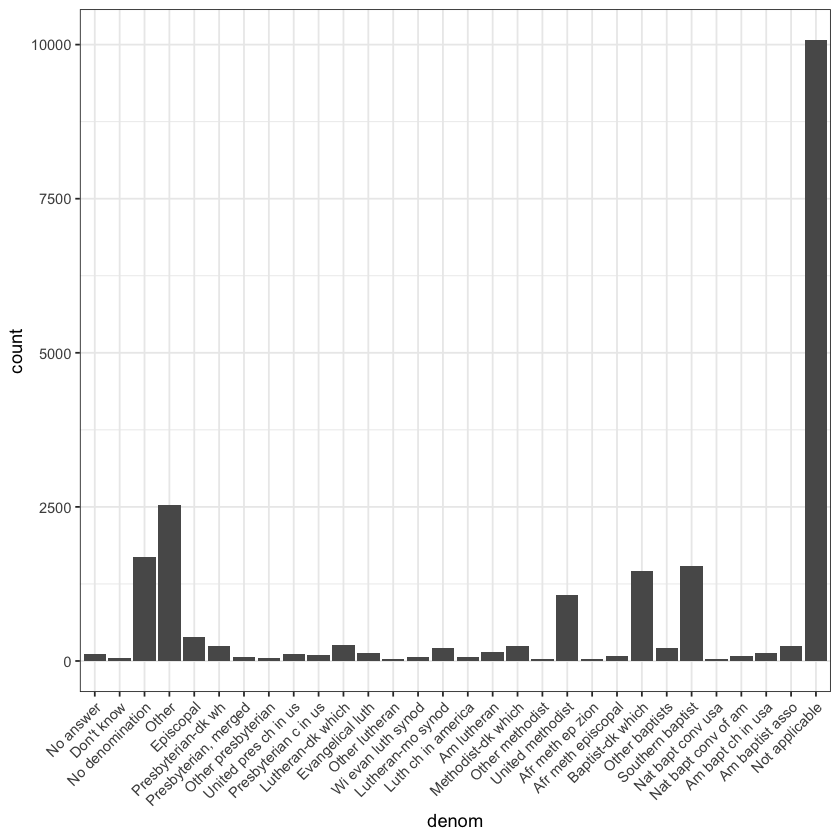

In [16]:
gss_cat %>% plot_cat()

### Q2 (5 points): Write a function (named ```plot_cat_cat```) to automatically detect and plot the *joint* distributions of all *pairs* of categorical variables in a given dataset. Hint: Use the following keywords:
```
function, for, seq_along, names, if, next, is.factor, ggplot, geom_count, labs, theme, print
```

In [17]:
plot_cat_cat <- function(df)
{
    nms <- names(df)
    nms.factor <- c()
    for(i in seq_along(nms))
    {
        if(is.factor(df[[nms[i]]]))
        {
            nms.factor <- c(nms.factor, nms[i]) 
        }
    }
    for(i in seq_along(nms.factor))
    {
        for(j in seq_along(nms.factor))
        {
            a = (i * 10) + j
            b = i + (j * 10)
            if(i==j)
            {
                next
            }
            if (a > b )
            {
                next
            }
            print(df %>% ggplot() + 
                  geom_count(aes_string(nms.factor[i], nms.factor[j]))+theme_bw() + 
                  theme(axis.text.x.bottom = element_text(angle = 45, hjust = 1)))
        }
    }
}

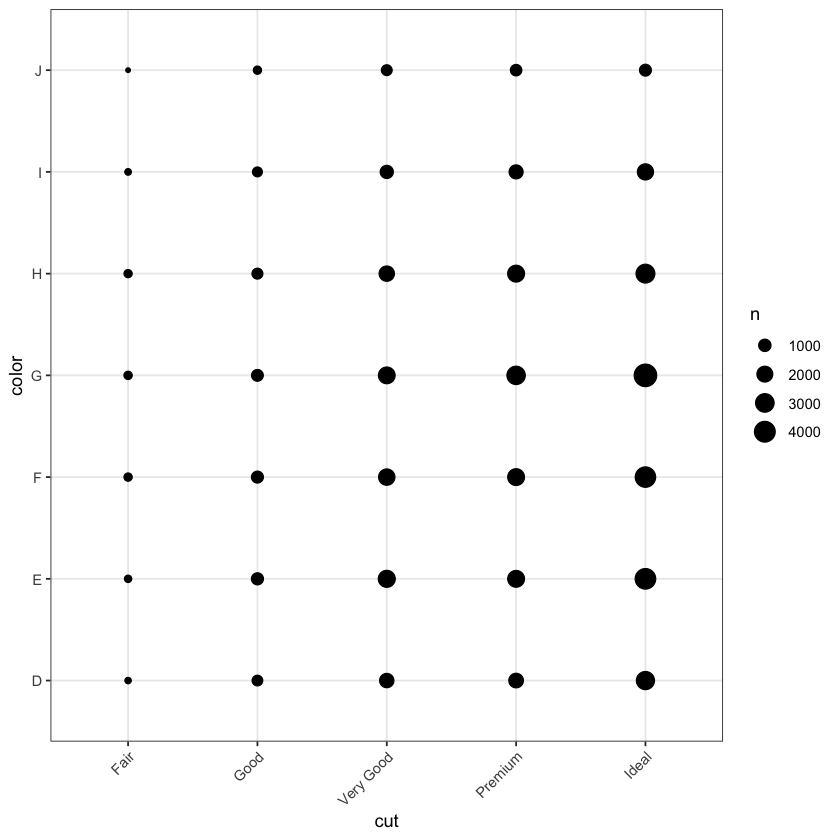

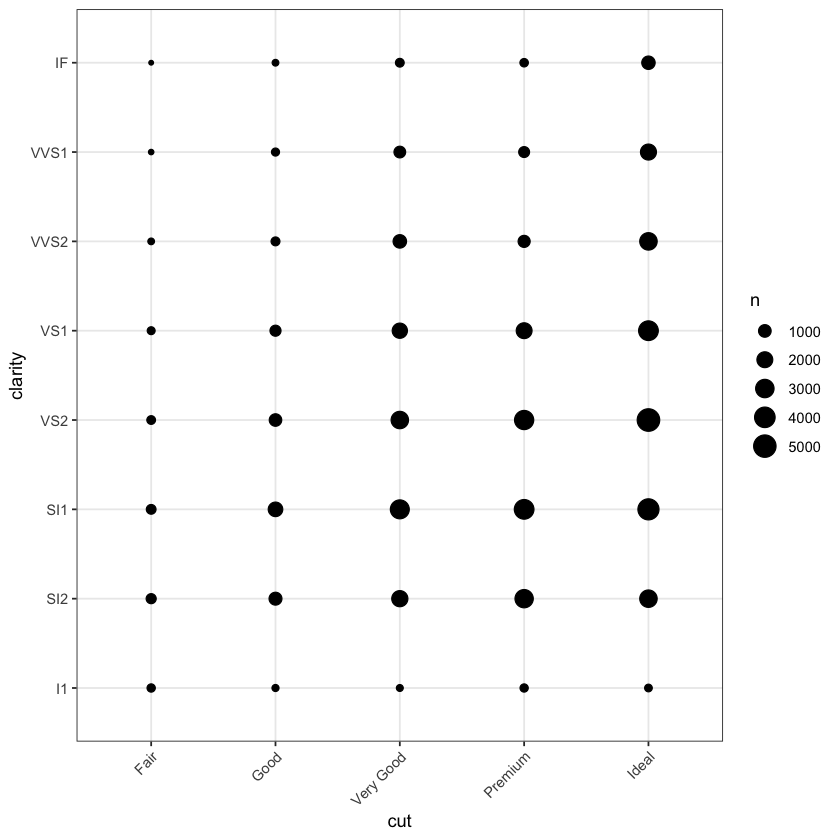

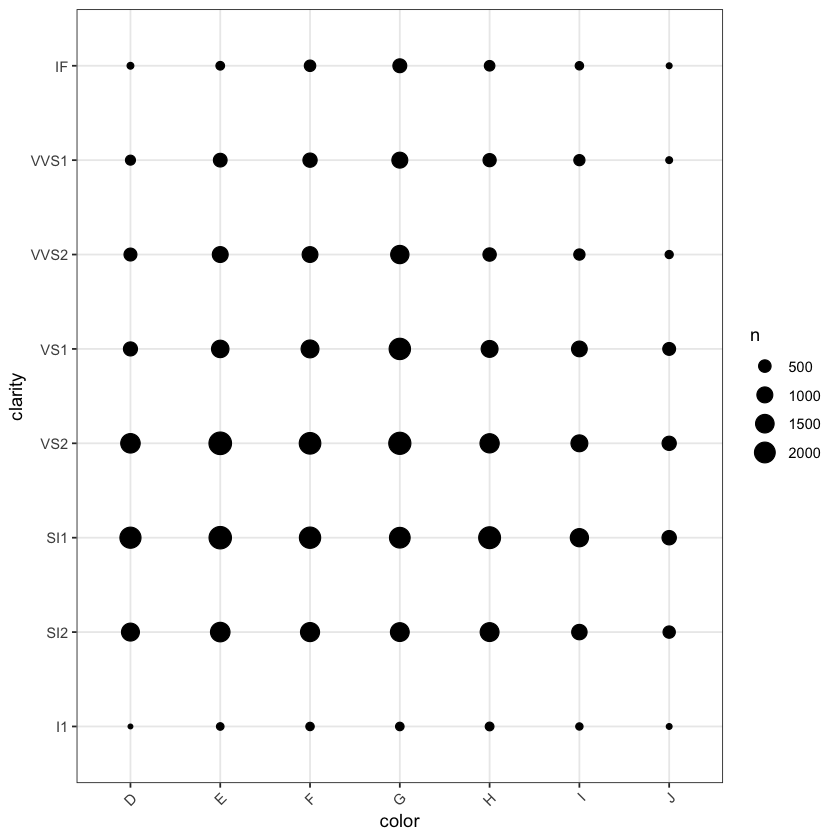

In [18]:
diamonds %>% plot_cat_cat()

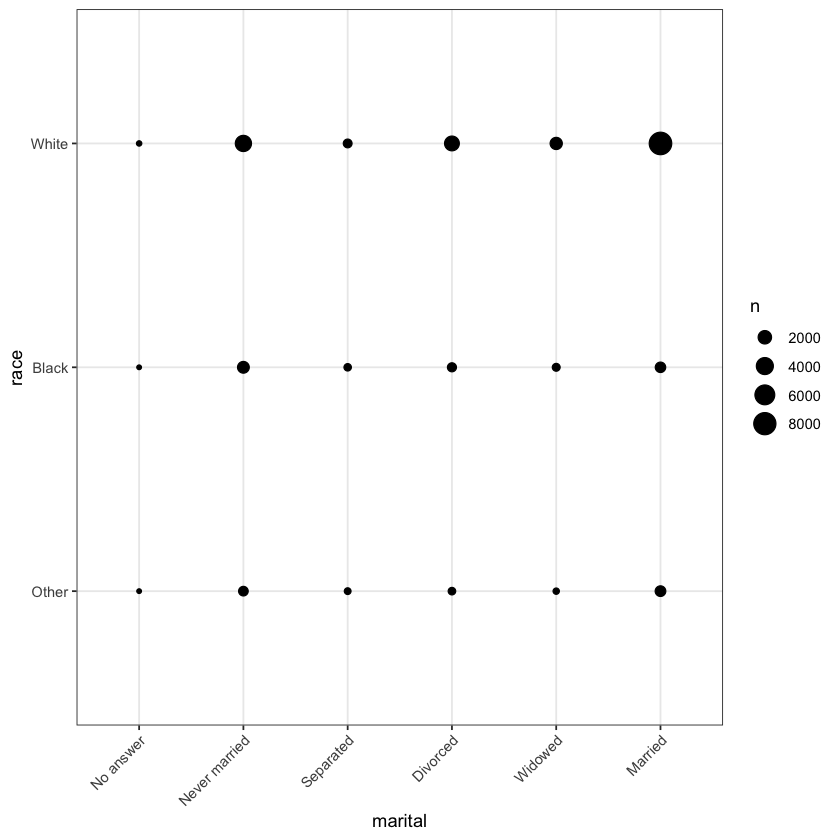

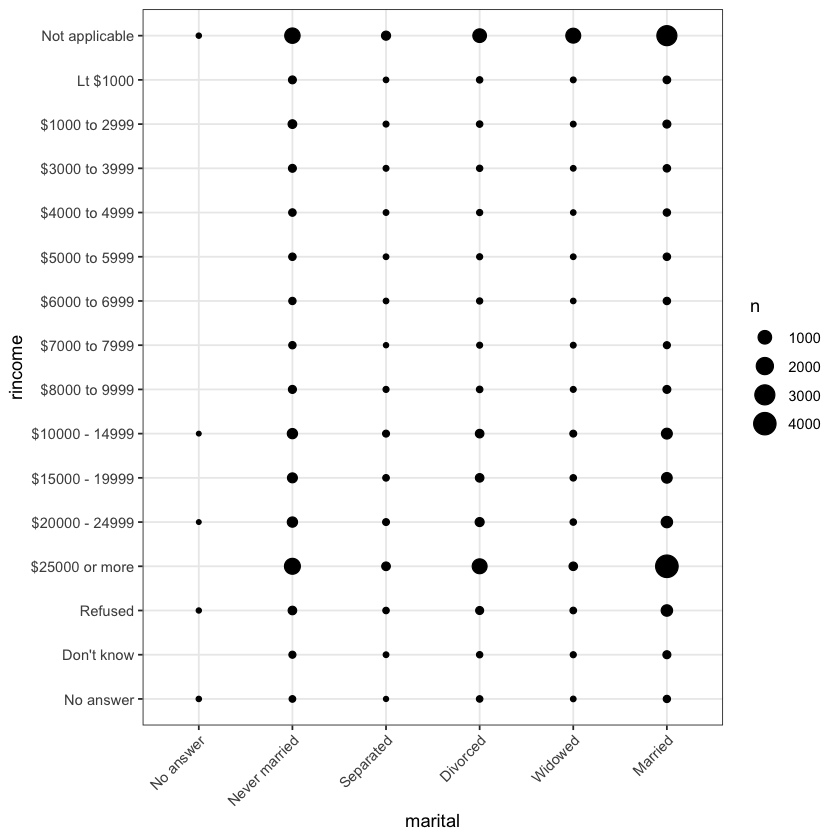

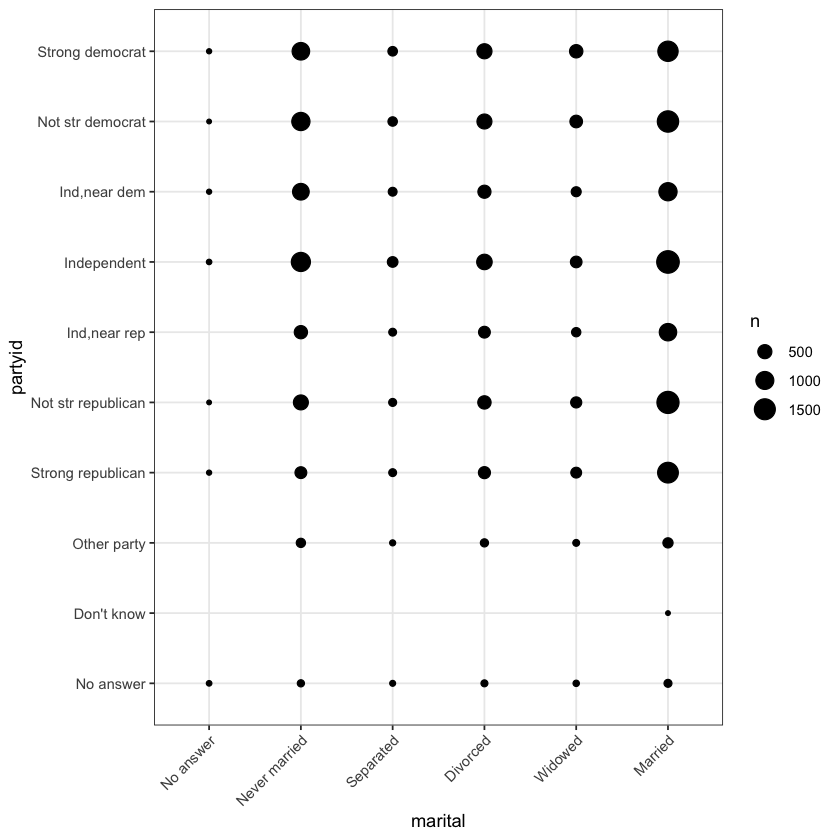

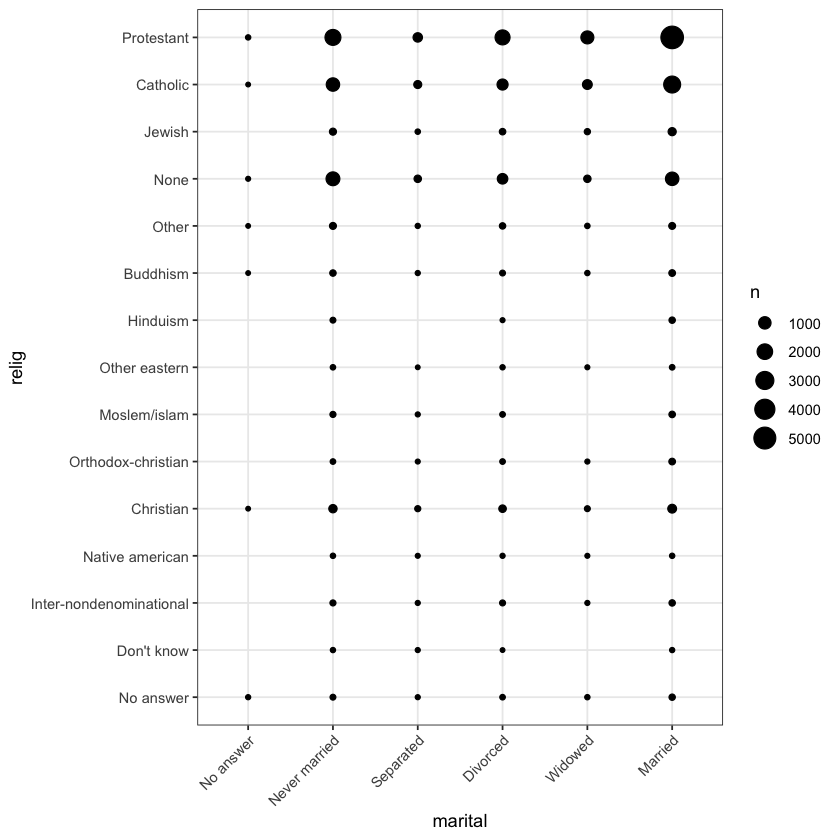

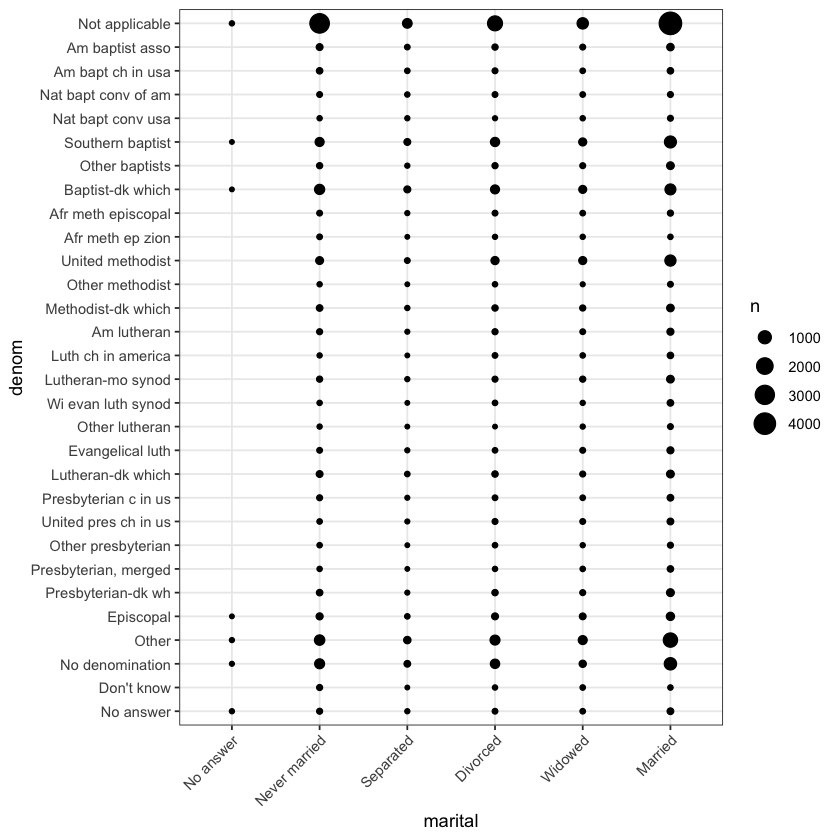

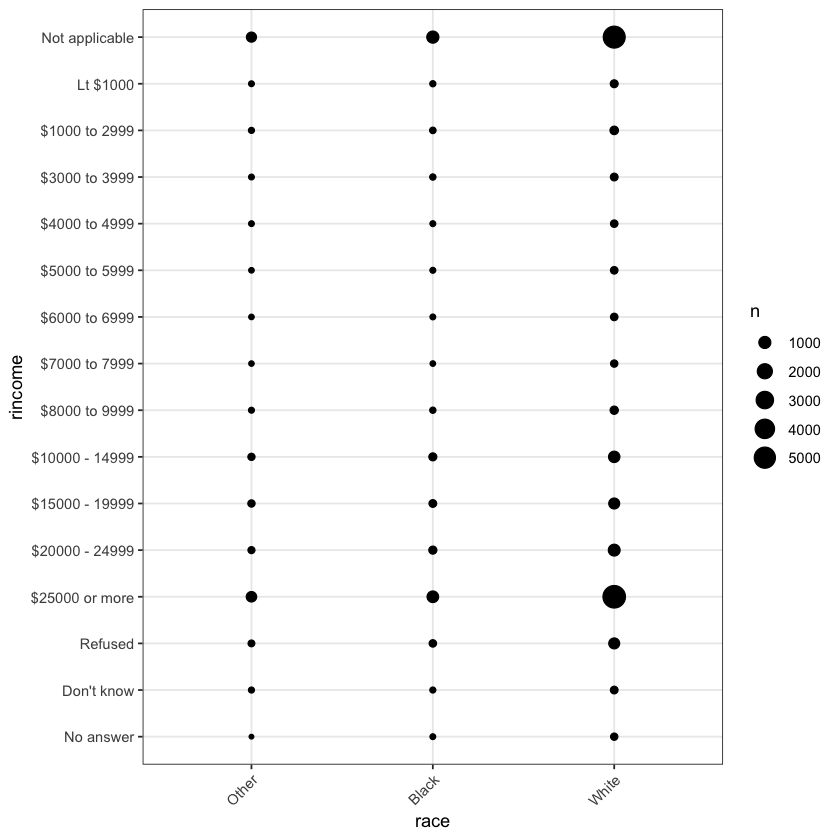

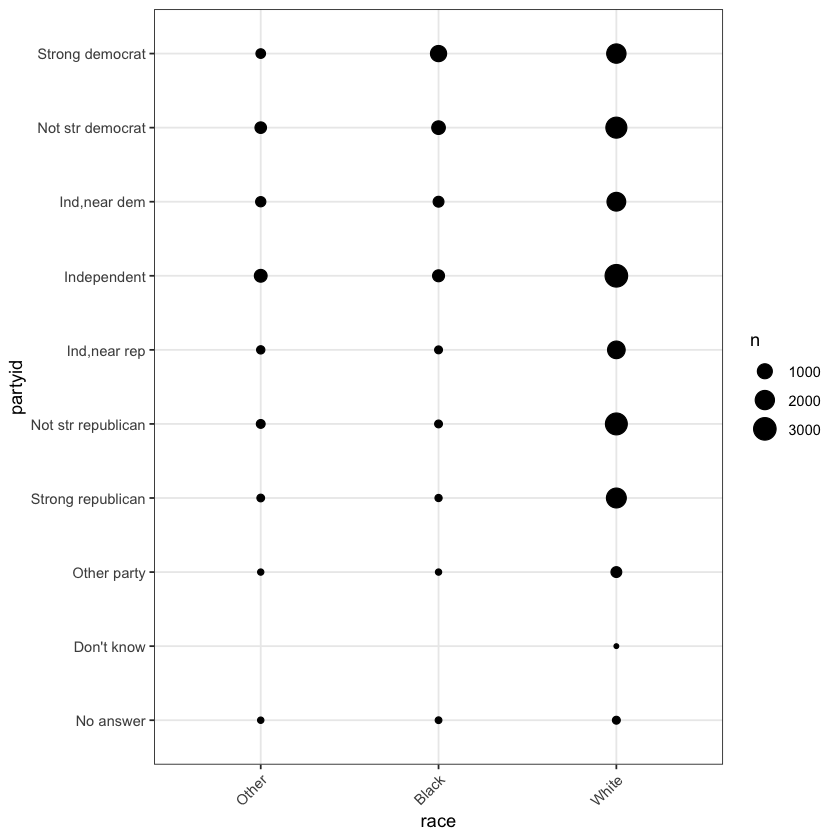

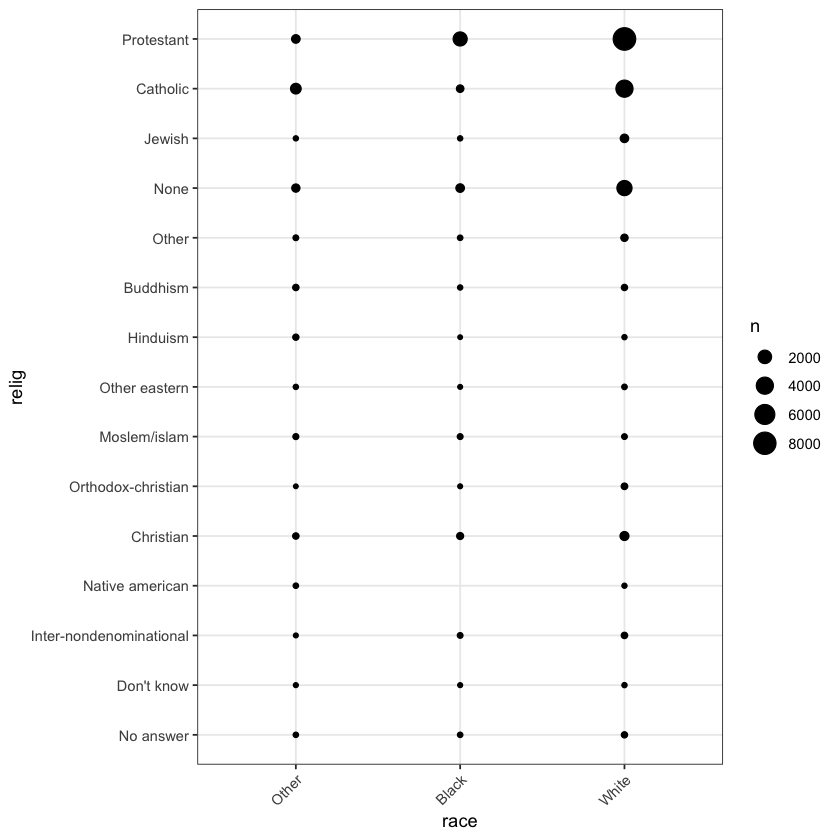

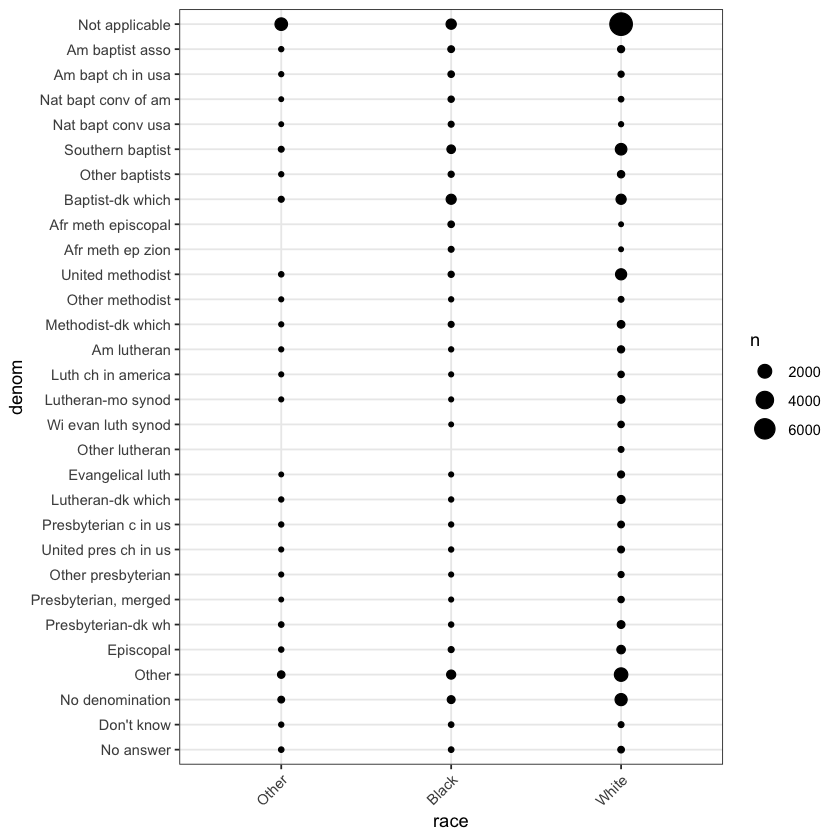

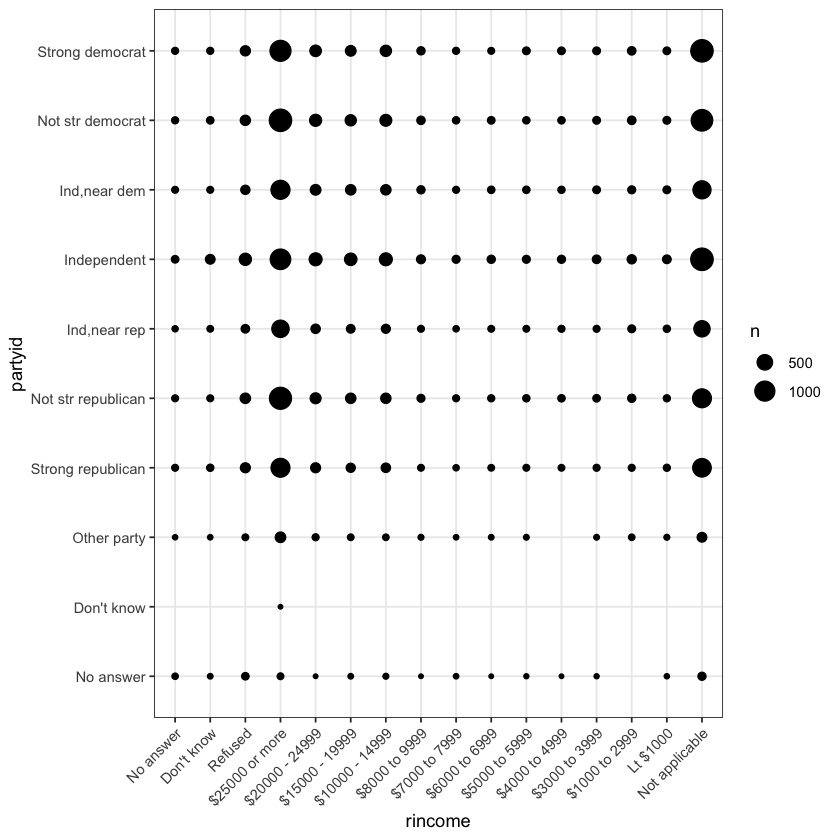

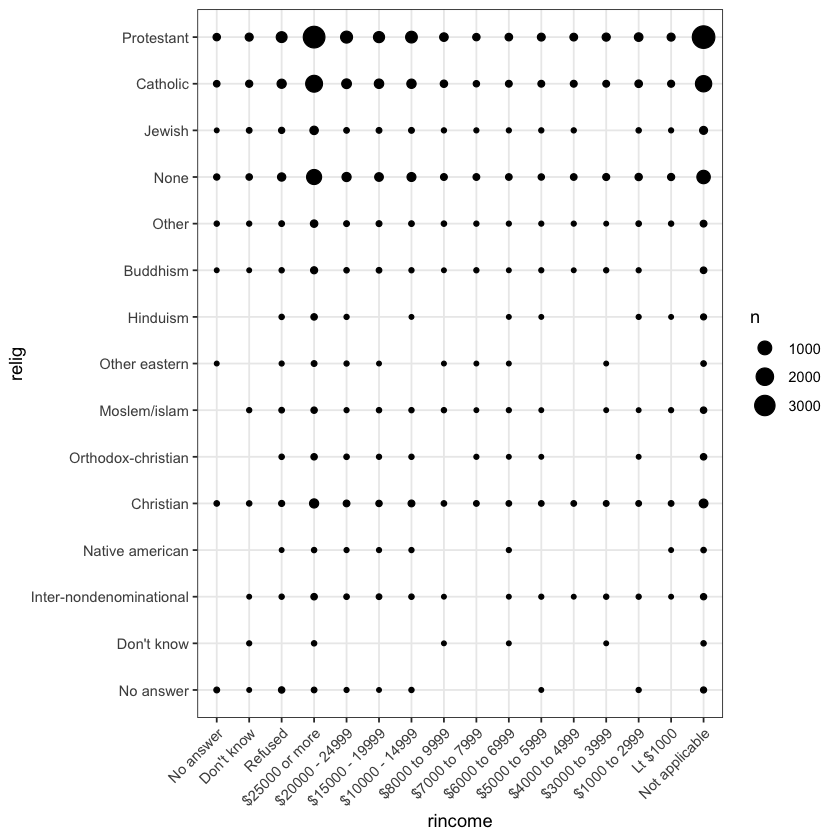

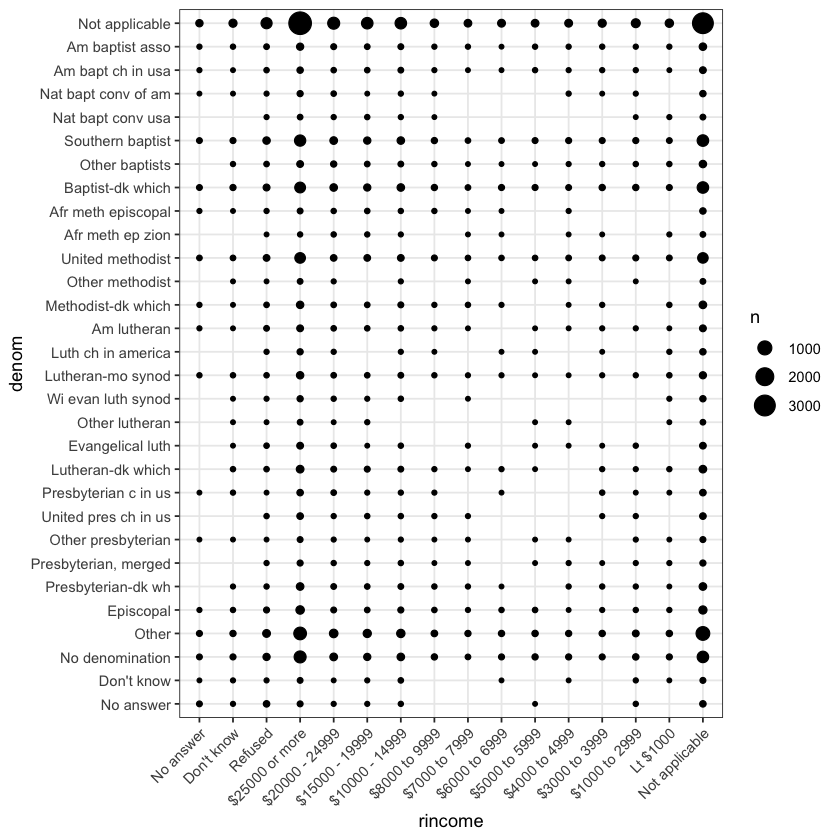

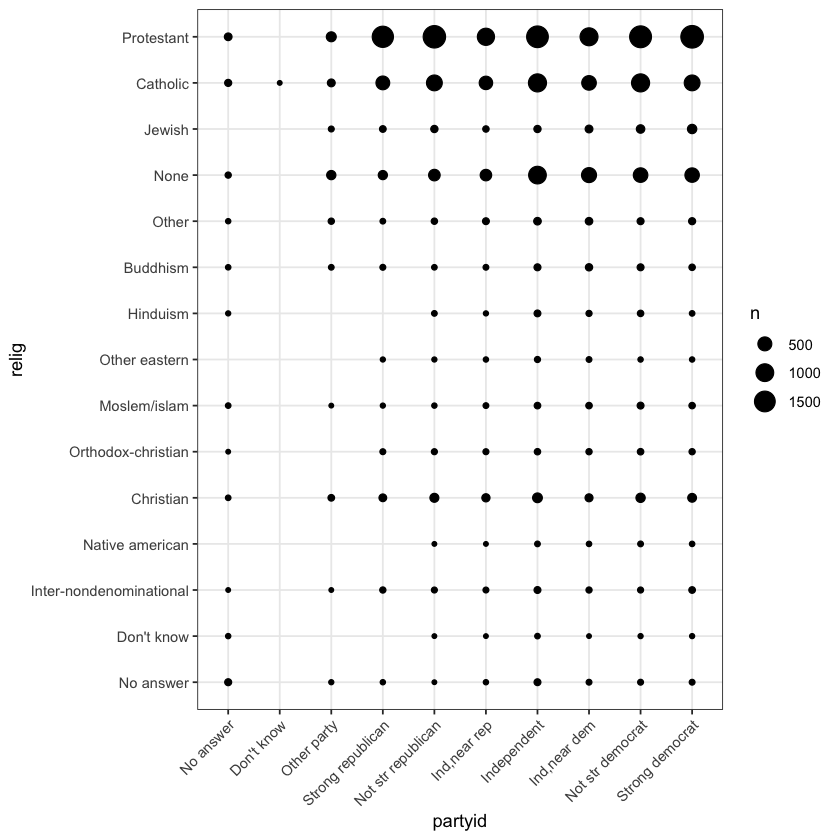

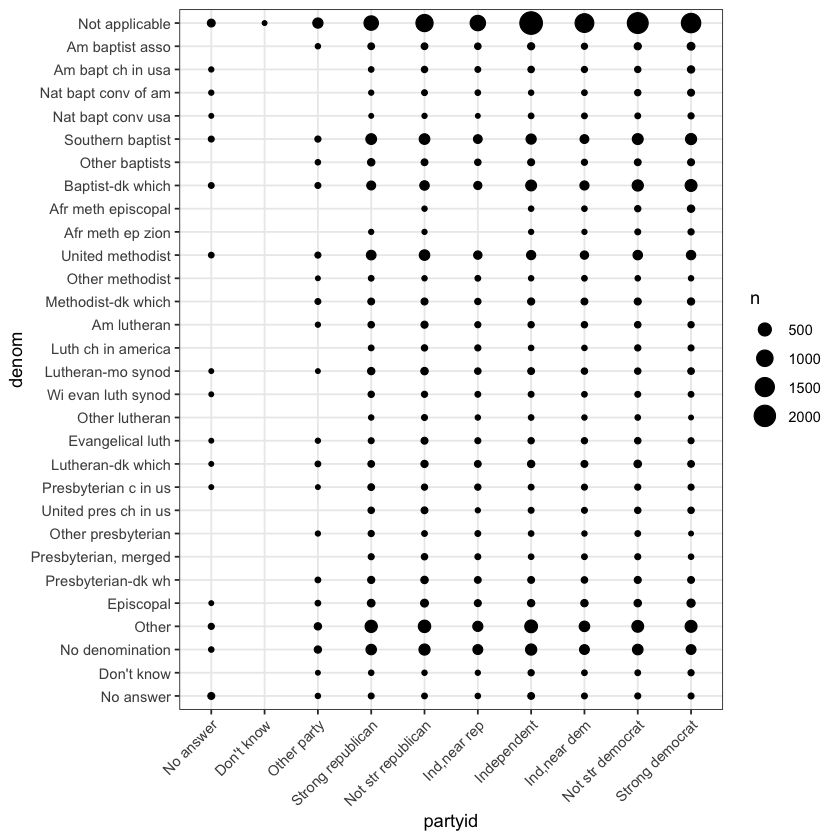

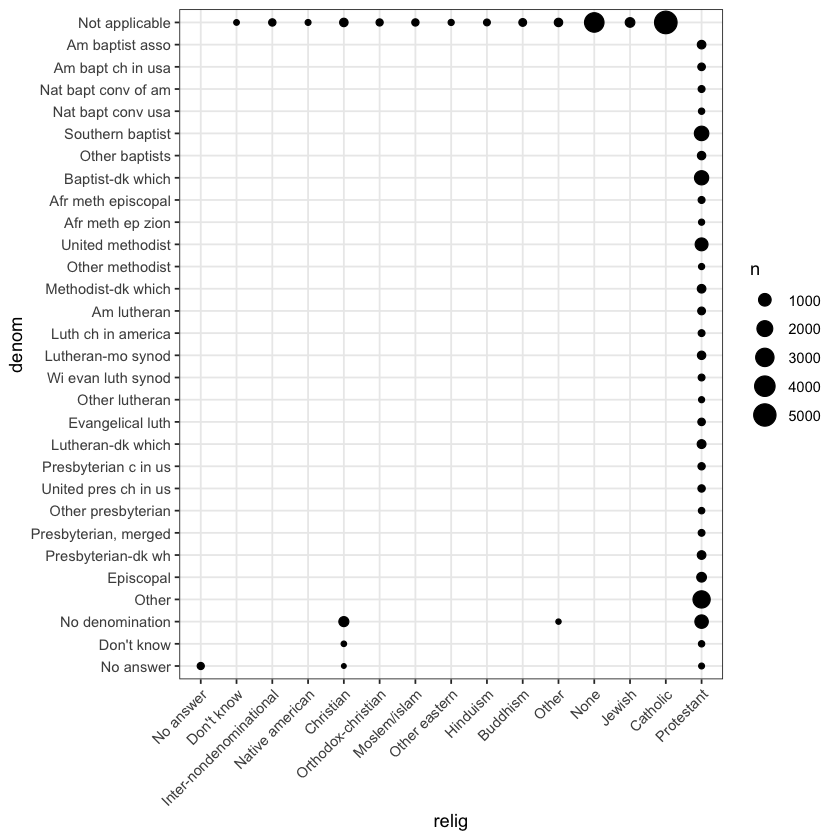

In [19]:
gss_cat %>% plot_cat_cat()

### Q3 (2 points): Standardize the columns of the following dataset. Hint: Use the following keywords:
```
function, map
```

In [9]:
df <- tibble(a = 3 + 10*rnorm(10000),
             b = -4 + 5*rnorm(10000),
             c = 500 + rnorm(10000),
             d = 33*rnorm(10000))

In [10]:
df %>% map(mean) %>% print()
df %>% map(sd) %>% print()

$a
[1] 2.96092

$b
[1] -4.037615

$c
[1] 499.9925

$d
[1] -0.360901

$a
[1] 9.984309

$b
[1] 4.950307

$c
[1] 1.005752

$d
[1] 32.89617



In [20]:
df <- df %>% map(function(x){(x-mean(x))/sd(x)})

In [21]:
df %>% map(mean) %>% print()
df %>% map(sd) %>% print()

$a
[1] 4.262216e-18

$b
[1] -3.336025e-17

$c
[1] -1.483294e-17

$d
[1] -6.308799e-18

$a
[1] 1

$b
[1] 1

$c
[1] 1

$d
[1] 1



### End.